In [38]:
from src.helper_functions.dgps import NormalGenerator, generate_means, compute_p_values
from src.helper_functions.methods import Bonferroni, BonferroniHochberg, BenjaminiHochberg
import numpy as np
from src.helper_functions.simulation_functs import run_simulation
from src.helper_functions.metrics import Power, TrueRejections, RejectionsNumber, FalseDiscoveryRate
from src.helper_functions.plot_functions import plot_with_bands, plot_individual, plot_grid, plot_boxplot
import matplotlib.pyplot as plt
from src.helper_functions.analyse_functions import analyse_function, aggregate_results

In [39]:
import pandas as pd
nsim = 10
methods = [Bonferroni(), BonferroniHochberg(), BenjaminiHochberg()]
alpha = 0.05
m = [4, 8, 16, 32, 64]
m0 = [3/4, 1/2, 1/4, 0]
metrics = [Power(), TrueRejections(), RejectionsNumber(), FalseDiscoveryRate()]
L = [5, 10]
scheme=["E", "I", "D"]

rng = np.random.default_rng(10)
a = pd.read_csv("data/simulated/full_simulation_results.csv")

In [3]:

import numpy as np
from scipy import stats, special
import time

z = np.random.randn(1000000)

# Original
t0 = time.time()
a = 2 * (1 - stats.norm.cdf(np.abs(z)))
print("stats.norm.cdf:", time.time() - t0)
    
# Faster
t0 = time.time()
b = special.erfc(np.abs(z) / np.sqrt(2))
print("special.erfc:", time.time() - t0)
print(np.allclose(a, b))

stats.norm.cdf: 0.02853679656982422
special.erfc: 0.012700796127319336
True


In [58]:
grouped_stats = analyse_function(
    a,
    x_axis="m",
    y_axis="FDR",
    factors=["method", "scheme", "m0_fraction"],
    group_variables=True,)

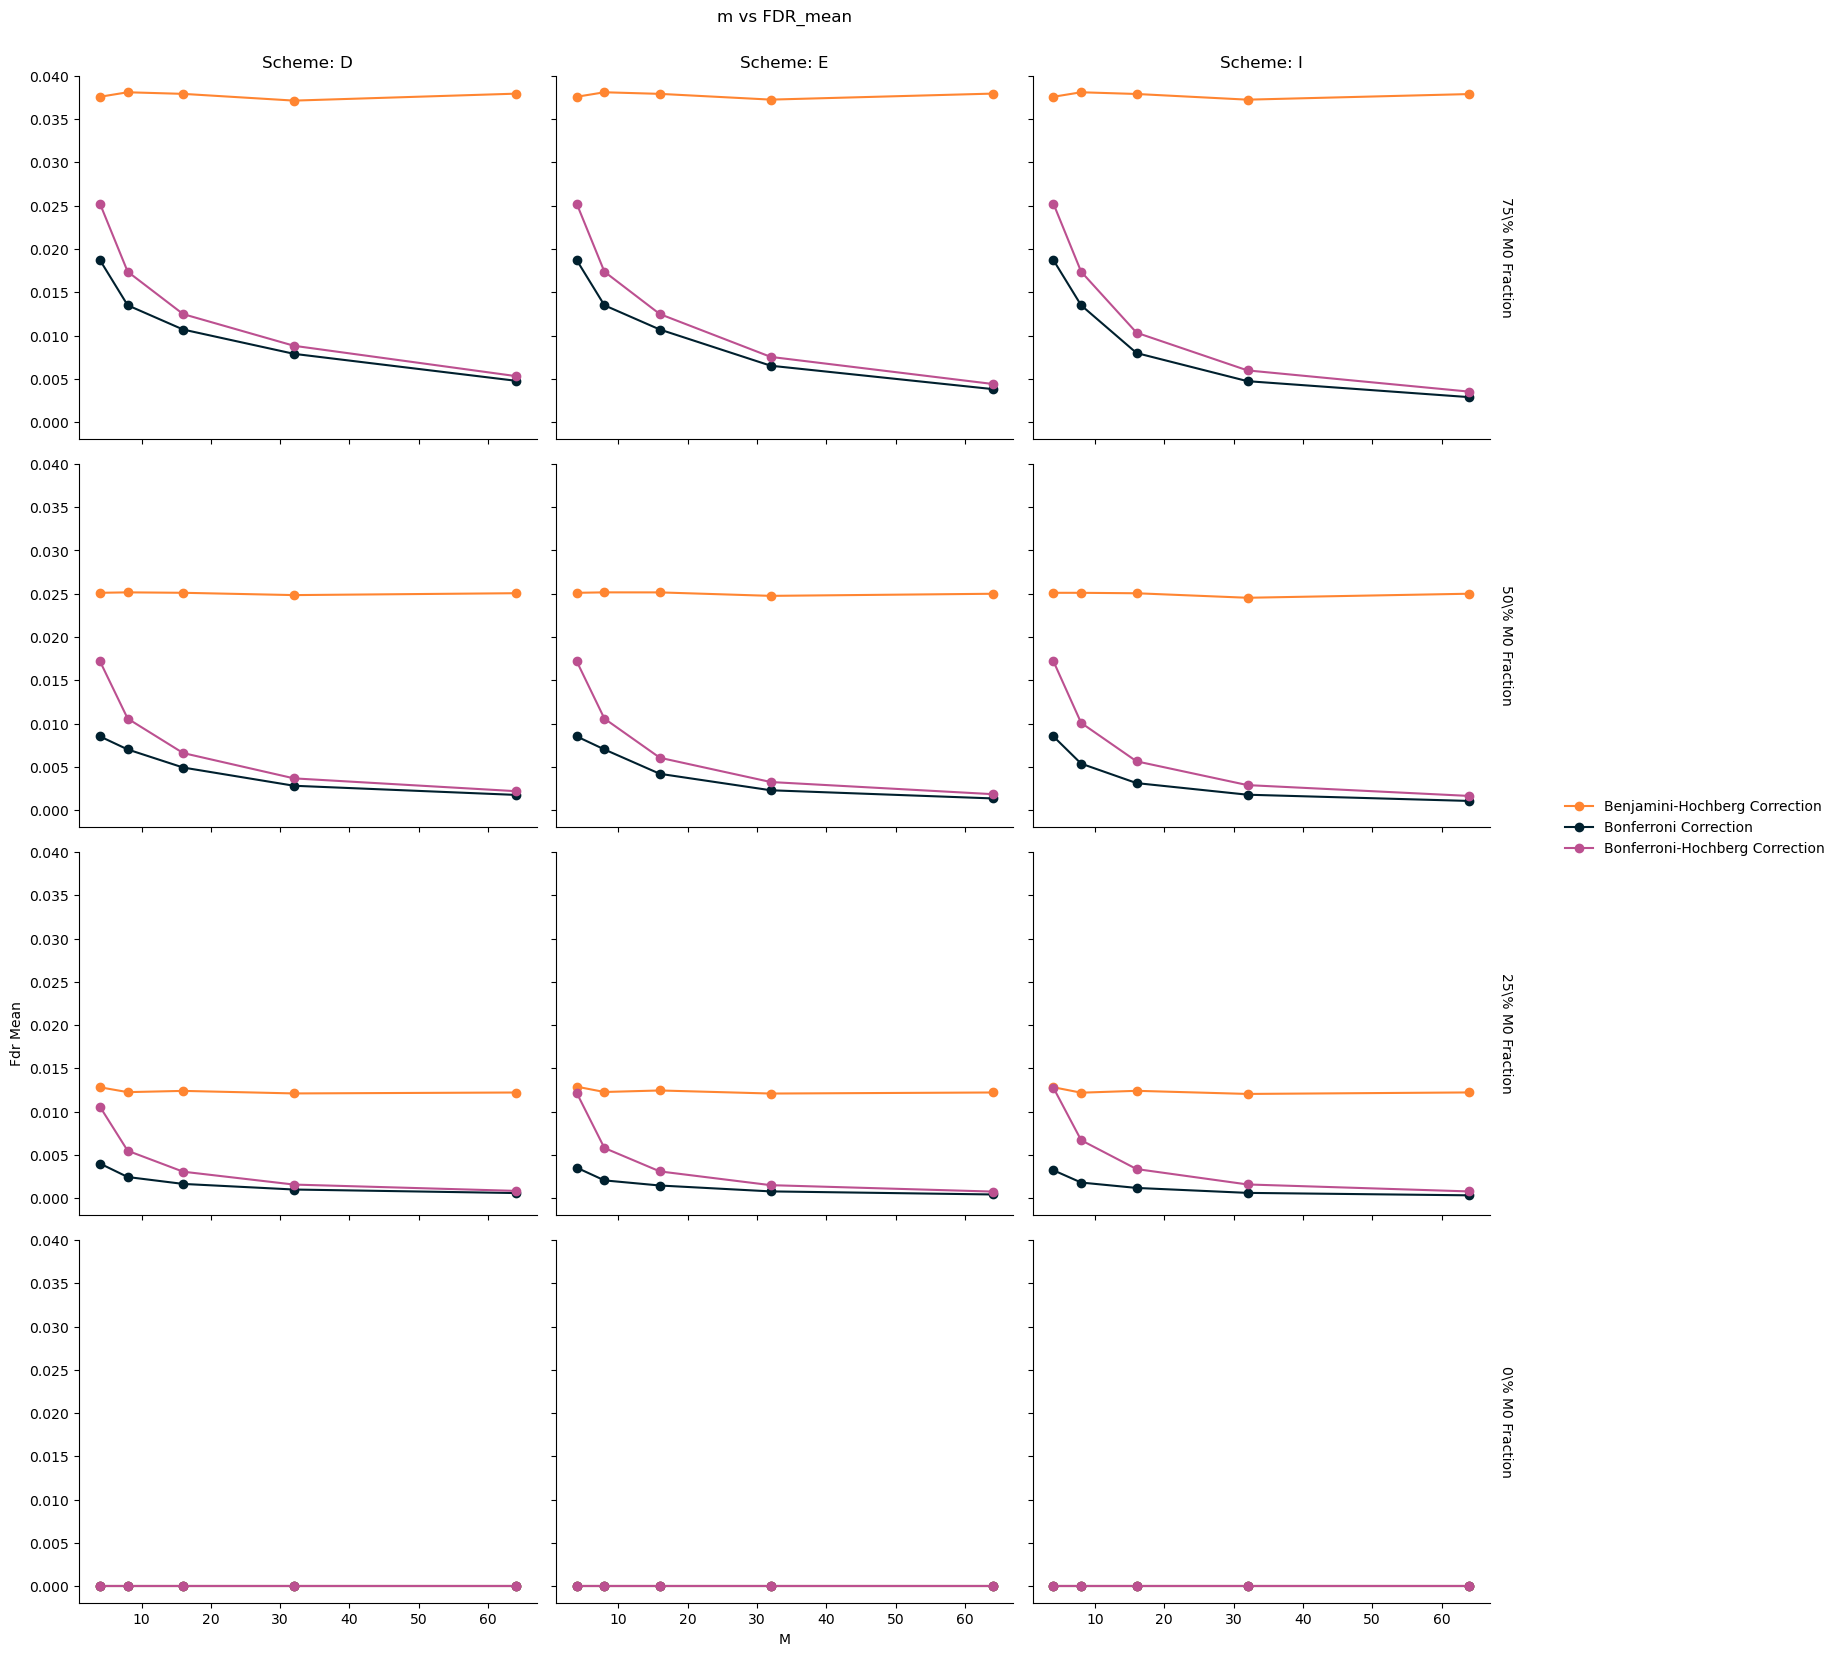

In [59]:
plot_grid(
    grouped_stats=grouped_stats,
    x_axis="m",
    y_axis="FDR_mean",
    factors=["method", "scheme", "m0_fraction"],
    plotting_function=plot_with_bands,
    height=4,
    colors = {'Bonferroni Correction': '#00202e', 'Bonferroni-Hochberg Correction': '#bc5090', 'Benjamini-Hochberg Correction': '#ff8531'}
)